Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import seaborn as sns
!pip install catboost 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import time
from sklearn.metrics import mean_squared_log_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import lightgbm as ltb
import catboost as cb
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## Preprocessing


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
train=shuffle(train)
ID = test['ID']
train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4393,02/06/2018,989,1,20.2,57,0.4,1428,11.4,0.00,0.0,0.0,Summer,No Holiday,Yes
2235,04/03/2018,90,3,8.5,96,0.4,238,7.8,0.00,0.1,0.0,Spring,No Holiday,Yes
1666,08/02/2018,160,10,-6.3,46,1.3,1346,-16.0,1.01,0.0,0.0,Winter,No Holiday,Yes
1076,14/01/2018,210,20,3.5,55,1.0,1100,-4.7,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes


In [3]:
train.isnull().sum()
test.isnull().sum()

ID                           0
Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [4]:


train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4393 to 2844
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6000 non-null   object 
 1   Rented Bike Count          6000 non-null   int64  
 2   Hour                       6000 non-null   int64  
 3   Temperature(°C)            6000 non-null   float64
 4   Humidity(%)                6000 non-null   int64  
 5   Wind speed (m/s)           6000 non-null   float64
 6   Visibility (10m)           6000 non-null   int64  
 7   Dew point temperature(°C)  6000 non-null   float64
 8   Solar Radiation (MJ/m2)    6000 non-null   float64
 9   Rainfall(mm)               6000 non-null   float64
 10  Snowfall (cm)              6000 non-null   float64
 11  Seasons                    6000 non-null   object 
 12  Holiday                    6000 non-null   object 
 13  Functioning Day            6000 non-null   ob

### Datatype Fixing and Label Encoding


In [5]:




import datetime as dt
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].apply(lambda x : x.month)
train['WeekDay'] = train['Date'].dt.day_name()
train['weekdays_weekend']=train['WeekDay'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
train=train.drop(columns=['Date','WeekDay'],axis=1)
#train['Date']=train['Date'].map(dt.datetime.toordinal)
test['Date'] = pd.to_datetime(test['Date'])
test['Month'] = test['Date'].apply(lambda x : x.month)
test['WeekDay'] = test['Date'].dt.day_name()
test['weekdays_weekend']=test['WeekDay'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
test=test.drop(columns=['Date','WeekDay'],axis=1)



#---------------------------------------------------------------------------------
train['Rented Bike Count'] = train['Rented Bike Count'].astype('int')
#---------------------------------------------------------------------------------
train.info()
train['train'] =1
test['train'] =0
combined = pd.concat((train,test))
df = pd.get_dummies(combined['Seasons'])
combined = pd.concat((combined,df),axis =1)

train = combined[combined['train']==1]
test = combined[combined['train']==0]

train.drop(['train','Seasons','ID'],axis =1 ,inplace =True)
test.drop(['train','Seasons','ID','Rented Bike Count'],axis =1 ,inplace =True)

print(train.head(5))
print("-------------------------------------------------")
print(test.head(5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4393 to 2844
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          6000 non-null   int64  
 1   Hour                       6000 non-null   int64  
 2   Temperature(°C)            6000 non-null   float64
 3   Humidity(%)                6000 non-null   int64  
 4   Wind speed (m/s)           6000 non-null   float64
 5   Visibility (10m)           6000 non-null   int64  
 6   Dew point temperature(°C)  6000 non-null   float64
 7   Solar Radiation (MJ/m2)    6000 non-null   float64
 8   Rainfall(mm)               6000 non-null   float64
 9   Snowfall (cm)              6000 non-null   float64
 10  Seasons                    6000 non-null   object 
 11  Holiday                    6000 non-null   object 
 12  Functioning Day            6000 non-null   object 
 13  Month                      6000 non-null   in

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
train['label_day_night']=train['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
test['label_day_night']=test['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:


categorical_features_train= train.select_dtypes(include='object')


categorical_features_test= test.select_dtypes(include='object')


In [8]:
#creating Dummy variable for categorical columns
dummy_categorical_feature_train= pd.get_dummies(categorical_features_train,drop_first=True)

dummy_categorical_feature_test= pd.get_dummies(categorical_features_test,drop_first=True)


In [9]:
# #concating numeric columns and dummy columns and creating final df
# final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
# #showing head of final df
# final_df.head()
train['Holiday'] = dummy_categorical_feature_train['Holiday_No Holiday']
train['Functioning Day'] = dummy_categorical_feature_train['Functioning Day_Yes']
train['label_day_night'] = dummy_categorical_feature_train['label_day_night_Night']

test['Holiday'] = dummy_categorical_feature_test['Holiday_No Holiday']
test['Functioning Day'] = dummy_categorical_feature_test['Functioning Day_Yes']
test['label_day_night'] = dummy_categorical_feature_test['label_day_night_Night']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [10]:
train

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
4393,989.0,1,20.2,57,0.4,1428,11.4,0.00,0.0,0.0,1,1,2,0,0,0,1,0,1
2235,90.0,3,8.5,96,0.4,238,7.8,0.00,0.1,0.0,1,1,4,0,0,1,0,0,1
1666,160.0,10,-6.3,46,1.3,1346,-16.0,1.01,0.0,0.0,1,1,8,0,0,0,0,1,0
1076,210.0,20,3.5,55,1.0,1100,-4.7,0.00,0.0,0.0,1,1,1,1,0,0,0,1,0
8,930.0,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,381.0,17,5.2,58,0.8,462,-2.4,0.08,0.0,0.0,1,1,1,0,0,0,0,1,0
169,230.0,1,-3.7,50,2.5,1902,-12.6,0.00,0.0,0.0,1,1,8,1,0,0,0,1,1
1306,90.0,10,-14.5,24,4.6,1902,-30.6,0.61,0.0,0.9,1,1,1,0,0,0,0,1,0
5933,188.0,5,27.3,84,0.8,1067,24.3,0.00,0.0,0.0,1,1,5,0,0,0,1,0,0


In [11]:


print(train.dtypes)
print("----------------------------------------------------")
print(test.dtypes)
train.head()

Rented Bike Count            float64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        uint8
Functioning Day                uint8
Month                          int64
weekdays_weekend               int64
Autumn                         uint8
Spring                         uint8
Summer                         uint8
Winter                         uint8
label_day_night                uint8
dtype: object
----------------------------------------------------
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Ra

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
4393,989.0,1,20.2,57,0.4,1428,11.4,0.00,0.0,0.0,1,1,2,0,0,0,1,0,1
2235,90.0,3,8.5,96,0.4,238,7.8,0.00,0.1,0.0,1,1,4,0,0,1,0,0,1
1666,160.0,10,-6.3,46,1.3,1346,-16.0,1.01,0.0,0.0,1,1,8,0,0,0,0,1,0
1076,210.0,20,3.5,55,1.0,1100,-4.7,0.00,0.0,0.0,1,1,1,1,0,0,0,1,0
8,930.0,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1,1,1,0,0,0,0,1,0


In [12]:
train.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.00000,6000.0,6000.000000,6000.000000,6000.00000,6000.000000
mean,645.229833,11.500000,10.996383,57.142667,1.816033,1362.965000,2.017383,0.578085,0.140050,0.08910,0.952000,0.992000,5.584000,0.29200,0.0,0.368000,0.272000,0.36000,0.333333
std,638.037663,6.922763,12.770873,20.977885,1.067520,621.492068,14.003660,0.886947,1.074779,0.43548,0.213784,0.089092,3.392471,0.45472,0.0,0.482302,0.445027,0.48004,0.471444
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
25%,175.000000,5.750000,0.500000,41.000000,1.000000,820.000000,-9.300000,0.000000,0.000000,0.00000,1.000000,1.000000,3.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
50%,386.500000,11.500000,10.800000,56.000000,1.600000,1546.000000,2.300000,0.020000,0.000000,0.00000,1.000000,1.000000,5.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
75%,971.250000,17.250000,21.700000,73.000000,2.500000,1976.250000,14.000000,0.930000,0.000000,0.00000,1.000000,1.000000,7.000000,1.00000,0.0,1.000000,1.000000,1.00000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,26.800000,3.520000,35.000000,5.10000,1.000000,1.000000,12.000000,1.00000,0.0,1.000000,1.000000,1.00000,1.000000


In [13]:
train.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month', 'weekdays_weekend', 'Autumn', 'Spring',
       'Summer', 'Winter', 'label_day_night'],
      dtype='object')

In [14]:
X_train =train.drop(['Rented Bike Count'], axis=1)
X_train_norm =train.drop(['Rented Bike Count'], axis=1)
X_train_stand =train.drop(['Rented Bike Count'], axis=1)

y_train = train['Rented Bike Count']
Xx_test = test


### Correlation

In [15]:


numeric_var = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Snowfall (cm)','Month','weekdays_weekend','label_day_night']
Data_Day_cor = train.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()

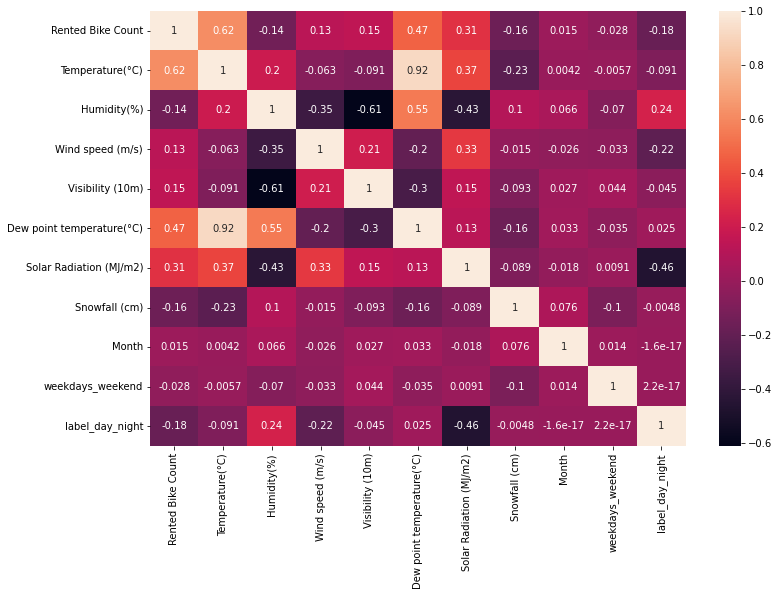

In [16]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(correlation_result,annot=True)

In [17]:
#We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)' so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.
train=train.drop(['Dew point temperature(°C)'],axis=1)
train=train.drop(['Wind speed (m/s)'],axis=1)
train=train.drop(['Snowfall (cm)'],axis=1)


In [18]:
test=test.drop(['Dew point temperature(°C)'],axis=1)
test=test.drop(['Wind speed (m/s)'],axis=1)
test=test.drop(['Snowfall (cm)'],axis=1)


In [19]:

train.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
4393,989.0,1,20.2,57,1428,0.00,0.0,1,1,2,0,0,0,1,0,1
2235,90.0,3,8.5,96,238,0.00,0.1,1,1,4,0,0,1,0,0,1
1666,160.0,10,-6.3,46,1346,1.01,0.0,1,1,8,0,0,0,0,1,0
1076,210.0,20,3.5,55,1100,0.00,0.0,1,1,1,1,0,0,0,1,0
8,930.0,8,-7.6,37,2000,0.01,0.0,1,1,1,0,0,0,0,1,0


## Distribution of data

Rented Bike Count


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


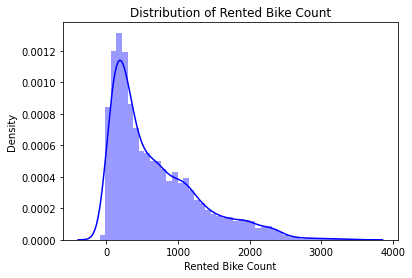

Temperature(°C)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


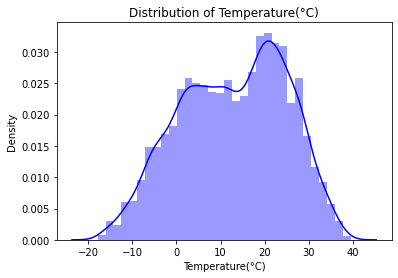

Humidity(%)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


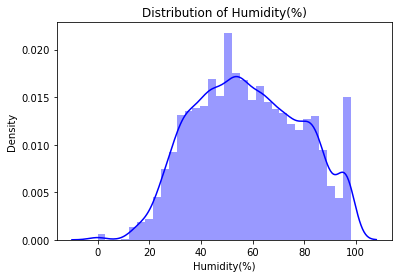

Wind speed (m/s)


KeyError: ignored

In [ ]:
for i in numeric_var:
    print(i)
    sns.distplot(train[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

In [20]:
train.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.0,6000.000000,6000.000000,6000.00000,6000.000000
mean,645.229833,11.500000,10.996383,57.142667,1362.965000,0.578085,0.140050,0.952000,0.992000,5.584000,0.29200,0.0,0.368000,0.272000,0.36000,0.333333
std,638.037663,6.922763,12.770873,20.977885,621.492068,0.886947,1.074779,0.213784,0.089092,3.392471,0.45472,0.0,0.482302,0.445027,0.48004,0.471444
min,0.000000,0.000000,-17.800000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
25%,175.000000,5.750000,0.500000,41.000000,820.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
50%,386.500000,11.500000,10.800000,56.000000,1546.000000,0.020000,0.000000,1.000000,1.000000,5.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000
75%,971.250000,17.250000,21.700000,73.000000,1976.250000,0.930000,0.000000,1.000000,1.000000,7.000000,1.00000,0.0,1.000000,1.000000,1.00000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,2000.000000,3.520000,35.000000,1.000000,1.000000,12.000000,1.00000,0.0,1.000000,1.000000,1.00000,1.000000


In [21]:
test.describe()

,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Functioning Day,Month,weekdays_weekend,Autumn,Spring,Summer,Winter,label_day_night
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.0,2760.000000,2760.0,2760.000000
mean,11.500000,16.984094,60.581884,1597.392754,0.549601,0.167464,0.947826,0.910507,8.573913,0.286957,0.791304,0.0,0.208696,0.0,0.333333
std,6.923441,8.589121,18.744341,545.185892,0.827621,1.236373,0.222418,0.285505,2.568025,0.452423,0.406450,0.0,0.406450,0.0,0.471490
min,0.000000,-3.000000,13.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,5.750000,10.100000,46.000000,1267.250000,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
50%,11.500000,17.100000,60.000000,1932.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,17.250000,23.800000,75.000000,2000.000000,0.940000,0.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.0,0.000000,0.0,1.000000
max,23.000000,37.400000,98.000000,2000.000000,3.450000,29.500000,1.000000,1.000000,12.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


# Models


In [22]:
# Create training and test sets 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [23]:
models=[LinearRegression(), Ridge(), RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor(), 
        XGBRegressor(), GradientBoostingRegressor()]
names =['Linear Regression', 'Ridge Regresion', 'Random Forest Regressor','AdaBoost Regressor','Bagging Regressor','SVR','KNeighbors Regressor', 'XGBoost Regressor', 'Gradient Boosting Regressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    real_test_pred_1=clf.predict(Xx_test)
    # test_pred_exp = np.expm1(test_pred)
    # y_test_exp = np.expm1(y_test)
    rmsle.append(np.sqrt(mean_squared_error(y_test , test_pred)))
d={'Model':names,'RMSLE':rmsle}   
rmsle_df = pd.DataFrame(d)
rmsle_df


[03:16:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,RMSLE
0,Linear Regression,412.705100
1,Ridge Regresion,412.732215
2,Random Forest Regressor,176.166383
3,AdaBoost Regressor,361.592781
4,Bagging Regressor,183.646739
5,SVR,655.605950
6,KNeighbors Regressor,381.699143
7,XGBoost Regressor,211.703088
8,Gradient Boosting Regressor,215.612206


## LGBM

In [24]:
lgbm_model = ltb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_LGBM = cross_val_score(lgbm_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
predicted_x_lgbm = lgbm_model.predict(X_test)
predicted_y__lgbm_real = lgbm_model.predict(Xx_test)

(-scores_LGBM)


array([116.56998074, 122.47916641, 109.01575464, 114.23894479,
       119.99565553, 115.69972788, 113.75272871, 115.23896878,
       111.36786446, 119.88133888, 120.54222638, 121.9285026 ,
       112.10034242, 111.00277425, 115.83748777, 124.62946654,
       107.81472874, 112.45315399, 119.21992597, 120.96070664,
       104.24506825, 113.24893698, 119.99484205, 120.57712197,
       116.33031724, 125.4129449 , 120.12724745, 112.31688074,
       106.84933513, 121.85900391])

In [25]:
score = np.sqrt(mean_squared_error(y_test,predicted_x_lgbm)) 
print(" mean squared error: {}".format(score))

 mean squared error: 163.080564500511


## 

##  RANDOM FOREST

In [ ]:
# #Let's find optimum parameters for each model
# model_rf = RandomForestRegressor(n_estimators=500, random_state=42)

# params ={'max_depth':[6, 7, 8],
#                'max_features':['auto','sqrt', 'log2']}


# #implement GridSearch
# cv_rf_model = GridSearchCV(param_grid = params, estimator=model_rf, cv=5, verbose=1 )
# cv_rf_model.fit(X_train, y_train)
# print('Best Score:', cv_rf_model.best_score_)
# print('Parameters:', cv_rf_model.best_params_)

In [26]:
model_rf = RandomForestRegressor(n_estimators=500, random_state=42)
params ={'max_depth':[ 6],
         'max_features':['auto']}

#implement Grid Search
cv_rf_model = GridSearchCV(model_rf, param_grid = params , cv=5, verbose = 1, scoring = "neg_mean_squared_error")

# Fit cv to the training set: 
cv_rf_model.fit(X_train, y_train)
y_pred_randf = cv_rf_model.predict(X_test)
y_pred_randf_real = cv_rf_model.predict(Xx_test)
# y_pred_log = np.expm1(y_pred)
# y_test_log = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test,y_pred_randf)) 
print(" mean squared error: {}".format(score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
 mean squared error: 241.2409149023895


## BAGGING REGRESSOR

In [ ]:
# #Let's find optimum parameters for each model
# model_br = BaggingRegressor(n_estimators=500, random_state=42)

# params ={'max_features':[6, 0.7, 0.8, 0.9, 0.1]}


# #Implement Grid Search 
# cv_br_model = GridSearchCV(param_grid = params, estimator=model_br, cv=5, verbose=1 )
# cv_br_model.fit(X_train, y_train)
# print('Best Score:', cv_br_model.best_score_)
# print('Parameters:', cv_br_model.best_params_)

In [27]:
model_br = BaggingRegressor(n_estimators=500, random_state=42)
params ={'max_features':[0.9]}

#implement Grid Search
cv_br_model = GridSearchCV(model_br, param_grid = params , cv=5, verbose = 1, scoring = "neg_mean_squared_error")

# Fit cv to the training set: 
cv_br_model.fit(X_train, y_train)
y_pred_baggingreg = cv_br_model.predict(X_test)
y_pred_baggingreg_real = cv_br_model.predict(Xx_test)
# y_pred_log = np.expm1(y_pred)
# y_test_log = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test,y_pred_baggingreg))
print("squared error: {}".format(score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
squared error: 177.7762968153235


## GRADIENT BOOSTING

In [ ]:
# #Let's find optimum parameters for each model
# model_gb = GradientBoostingRegressor(n_estimators=500,  random_state=42)

# params ={'max_depth':[4, 5, 6],
#          'max_features':['auto','sqrt', 'log2'],
#          'loss':['ls','lad', 'huber']}

# #Implement Grid Search 
# cv_gb_model = GridSearchCV(param_grid= params, estimator=model_gb, cv=5, verbose=1)
# cv_gb_model.fit(X_train, y_train)
# print('Best Score:', cv_gb_model.best_score_)
# print('Parameters:', cv_gb_model.best_params_)

In [28]:
model_gb = GradientBoostingRegressor(n_estimators=500,  random_state=42)
params ={'max_depth':[ 5],
         'max_features':['auto'],
         'loss':['squared_error']}

cv_gb_model = GridSearchCV(model_gb, param_grid = params , cv=5, verbose = 1, scoring = "neg_mean_squared_error")

# Fit cv to the training set: 
cv_gb_model.fit(X_train, y_train)
y_pred_grad = cv_gb_model.predict(X_test)
y_pred_grad_real = cv_br_model.predict(Xx_test)
# y_pred_log = np.expm1(y_pred)
# y_test_log = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test,y_pred_grad))
print("Negative mean squared log error: {}".format(score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Negative mean squared log error: 170.1515852998343


## XGBOOST

In [ ]:
# #Let's find optimum parameters for each model
# model_xgb = XGBRegressor(n_estimators=500, objective='reg:squarederror', random_state=42)

# params ={'max_depth':[4, 5, 6],
#                'learning_rate':[0.05, 0.1, 0.2],
#                'booster':['gbtree','dart', 'gblinear']}


# #Implement Grid Search over XGBoost
# cv_xgb_model = GridSearchCV(param_grid= params, estimator=model_xgb, cv=5, verbose=1)
# cv_xgb_model.fit(X_train, y_train)#Training the Model
# print('Best Score:', cv_xgb_model.best_score_)
# print('Parameters:', cv_xgb_model.best_params_)

In [29]:

model_xgb = XGBRegressor(random_state=42, n_estimators = 500, objective = 'reg:squarederror')
params = {"max_depth": [5],
              "learning_rate": [0.1],
              "booster": ["dart"]}

cv_xgb_model = GridSearchCV(model_xgb, param_grid = params , cv=5, verbose = 1, scoring = "neg_mean_squared_error")

# Fit cv to the training set: 
cv_xgb_model.fit(X_train, y_train)
y_pred_xgb = cv_xgb_model.predict(X_test)
y_pred_xgb_real = cv_br_model.predict(Xx_test)
# y_pred_log = np.expm1(y_pred)
# y_test_log = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
print("Negative mean squared log error: {}".format(score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Negative mean squared log error: 167.86176372238162


## catbost


In [30]:
import catboost as cb
train_dataset = cb.Pool(X_train, y_train)
catmodel = cb.CatBoostRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cat = cross_val_score(lgbm_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
catmodel.grid_search(grid, train_dataset)
(-scores_cat)
#134 mean square error

Streaming output truncated to the last 5000 lines.
156:	learn: 225.2632301	test: 250.0311772	best: 250.0311772 (156)	total: 410ms	remaining: 112ms
157:	learn: 224.8274333	test: 249.7312533	best: 249.7312533 (157)	total: 413ms	remaining: 110ms
158:	learn: 224.5060182	test: 249.5189921	best: 249.5189921 (158)	total: 415ms	remaining: 107ms
159:	learn: 224.0023113	test: 248.9965125	best: 248.9965125 (159)	total: 417ms	remaining: 104ms
160:	learn: 223.7274873	test: 248.7258259	best: 248.7258259 (160)	total: 420ms	remaining: 102ms
161:	learn: 223.4751224	test: 248.5132776	best: 248.5132776 (161)	total: 422ms	remaining: 99.1ms
162:	learn: 223.1606198	test: 248.1197632	best: 248.1197632 (162)	total: 425ms	remaining: 96.4ms
163:	learn: 222.8750106	test: 247.9603365	best: 247.9603365 (163)	total: 427ms	remaining: 93.8ms
164:	learn: 222.6428549	test: 247.8117579	best: 247.8117579 (164)	total: 430ms	remaining: 91.1ms
165:	learn: 222.3509758	test: 247.5886812	best: 247.5886812 (165)	total: 432ms	re

array([116.56998074, 122.47916641, 109.01575464, 114.23894479,
       119.99565553, 115.69972788, 113.75272871, 115.23896878,
       111.36786446, 119.88133888, 120.54222638, 121.9285026 ,
       112.10034242, 111.00277425, 115.83748777, 124.62946654,
       107.81472874, 112.45315399, 119.21992597, 120.96070664,
       104.24506825, 113.24893698, 119.99484205, 120.57712197,
       116.33031724, 125.4129449 , 120.12724745, 112.31688074,
       106.84933513, 121.85900391])

In [31]:
#catmodel.fit(x_train, y_train)
preds = catmodel.predict(X_test)

cat_error=np.sqrt(mean_squared_error(y_test,preds))

In [32]:
cat_error=np.sqrt(mean_squared_error(y_test,preds))
cat_error

160.78419150601042

In [33]:
preds_real = catmodel.predict(Xx_test)

## VOTING REGRESSOR

In [34]:
vr = VotingRegressor([
                      ('lgbm',ltb.LGBMRegressor(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=130,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)),

                     ('cat', cb.CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50)),
                      
                         
                        
                         ])

vr.fit(X_train,y_train)
y_pred_voting_real = vr.predict(Xx_test)
y_pred_voting = vr.predict(X_test)
# y_pred_exp = np.expm1(y_pred)
# y_test_exp = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test, y_pred_voting))
print(score)

0:	learn: 619.4598844	total: 23.1ms	remaining: 11.5s
50:	learn: 234.8698908	total: 751ms	remaining: 6.62s
100:	learn: 182.5795198	total: 1.51s	remaining: 5.96s
150:	learn: 161.8079393	total: 2.26s	remaining: 5.23s
200:	learn: 144.2665058	total: 3s	remaining: 4.46s
250:	learn: 129.6382806	total: 3.69s	remaining: 3.66s
300:	learn: 117.4217653	total: 4.43s	remaining: 2.93s
350:	learn: 107.0813196	total: 5.19s	remaining: 2.2s
400:	learn: 98.4118296	total: 5.96s	remaining: 1.47s
450:	learn: 91.7051684	total: 6.69s	remaining: 727ms
499:	learn: 85.8264905	total: 7.41s	remaining: 0us
165.88930582217446


### Weighted Average

In [35]:
# y_avg =( y_pred_xgb*4+ y_pred_grad*5 + predicted_x_lgbm*12 + preds*9 + y_pred_randf*8) /(9+5+4+12+8)
y_avg =(  y_pred_xgb*7+ predicted_x_lgbm*9 + preds*10 ) /(7+10+9)
score = np.sqrt(mean_squared_error(y_test, y_avg))
print(score)

156.9073473710345


In [36]:

y_avg_real =( y_pred_xgb_real*7+ predicted_y__lgbm_real*9+preds_real*10) /(7+9+10)


In [37]:
submission = {'ID':ID,'Rented Bike Count':y_avg_real}
submission = pd.DataFrame(submission)
submission.to_csv("Submission_avg_cat&lgbm&xgb_drop3", index=False)

### Merging

In [ ]:
raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv('test.csv')

In [ ]:
raw_train.columns

In [ ]:
raw_test.columns

In [ ]:
raw_test.drop('ID',axis =1,inplace =True)
raw_test.insert(1,column ='Rented Bike Count',value = y_pred_voting_real)

In [ ]:
raw_test.columns

In [ ]:
raw_test.columns

In [ ]:
raw_train.columns

In [ ]:
raw_test

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,8/8/2018,918.868810,0,29.1,77,2.1,1465,24.6,0.0,0.0,0.0,Summer,No Holiday,Yes
1,8/8/2018,686.848107,1,28.5,80,1.5,1306,24.7,0.0,0.0,0.0,Summer,No Holiday,Yes
2,8/8/2018,512.302185,2,28.3,84,2.1,1099,25.3,0.0,0.0,0.0,Summer,No Holiday,Yes
3,8/8/2018,324.621637,3,28.3,84,0.5,1006,25.3,0.0,0.0,0.0,Summer,No Holiday,Yes
4,8/8/2018,225.846393,4,28.0,85,1.0,1079,25.2,0.0,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,30/11/2018,483.076331,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2756,30/11/2018,421.052085,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2757,30/11/2018,406.756992,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2758,30/11/2018,383.918601,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
raw_train

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7/8/2018,1898,19,32.9,56,2.6,1944,22.9,0.40,0.0,0.0,Summer,No Holiday,Yes
5996,7/8/2018,1836,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,Summer,No Holiday,Yes
5997,7/8/2018,1826,21,30.3,69,2.2,1834,23.9,0.00,0.0,0.0,Summer,No Holiday,Yes
5998,7/8/2018,1664,22,29.8,75,1.4,1609,24.8,0.00,0.0,0.0,Summer,No Holiday,Yes


In [ ]:

full = pd.concat((raw_train,raw_test),axis =0)
full

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254.000000,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204.000000,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173.000000,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107.000000,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78.000000,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,30/11/2018,500.706465,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2756,30/11/2018,454.480045,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2757,30/11/2018,443.385999,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2758,30/11/2018,432.022238,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
full.info()

In [ ]:
new_train = pd.DataFrame(full)
new_train.to_csv("train", index=False)